# Matplotlib Format Charts

**fig, ax = plt.subplots()**

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_title_short'>

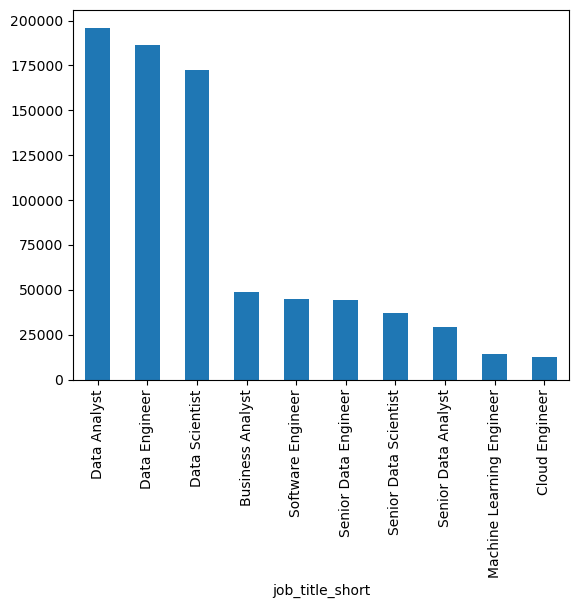

In [2]:
# fig, ax are the standard nomenclature for these variables
fig, ax = plt.subplots()
# Let's plot the total count of job_title_short
df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

In [3]:
# Let's look into the first 3 values of the job_schedule_type
df['job_schedule_type'].head(3)

0    Full-time
1    Full-time
2    Full-time
Name: job_schedule_type, dtype: object

### Using Pandas

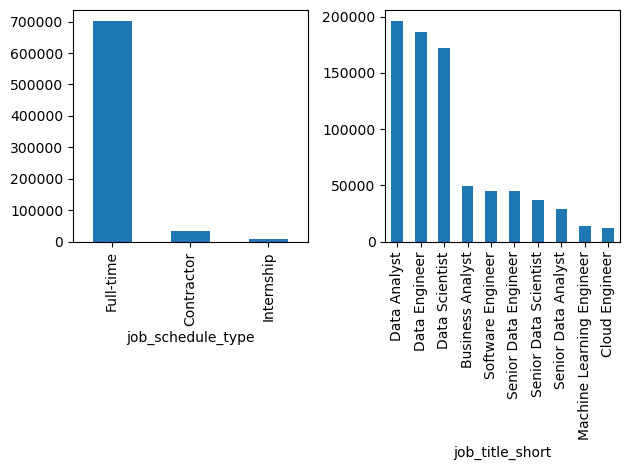

In [4]:
# Now let's put the info from the job_title_short along with the info from the job_schedule_type in the same figure
# plt.subplots(rows,columns)
fig, ax = plt.subplots(1,2)

df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])

fig.tight_layout()

### Using Matplotlib

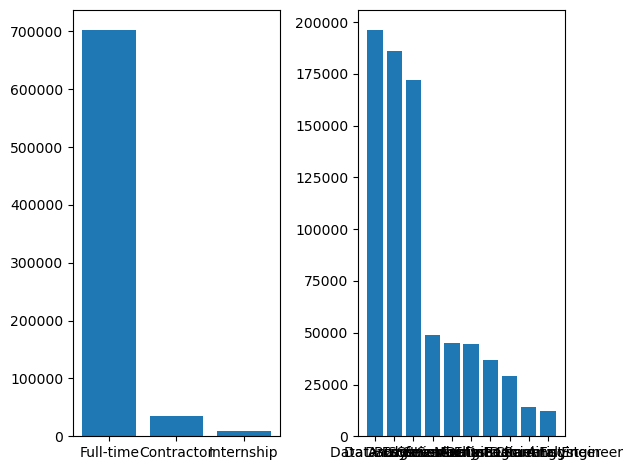

In [ ]:
# Now let's put the info from the job_title_short along with the info from the job_schedule_type in the same figure
# plt.subplots(rows,columns)
fig, ax = plt.subplots(1,2)

ax[0].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))
ax[1].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())

plt.tight_layout() #this function puts some space between the two charts

As we can see above, it is much more verbose to use Matplotlib.
Pandas gives the same outlook in a simpler set of commands.
We're sticking to Pandas!

### Plotting the data for 3 job_title_short positions in one figure

In [10]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [11]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

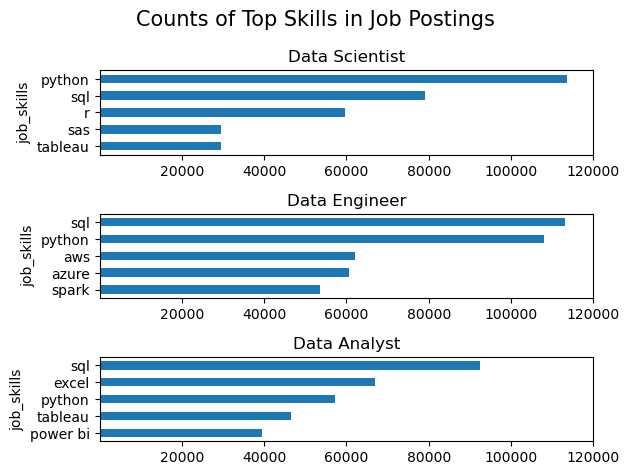

In [28]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    # print(i, job_title)
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].legend().remove()
    # when we firs ran this, the scale for the Data Analyst was diffent from the other 2 jobs, we we will run the command xlim
    ax[i].set_xlim(1, 120_000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout() #this function puts some space between the two charts


